<a href="https://colab.research.google.com/github/a-ayushigit/Recommendation_movies/blob/main/MovieDataClean%26Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
movies = pd.read_csv('/content/movies.dat' , delimiter="::" , header=None , names=['movie_id' , 'title' , 'genres'] , engine="python")
ratings = pd.read_csv('/content/ratings.dat' , delimiter="::" , header=None , names=['user_id','movie_id' , 'rating' ,'timestamp' ] , engine="python")
tags = pd.read_csv('/content/ratings.dat' , delimiter="::" , header=None , names=['user_id','movie_id' , 'tag' ,'timestamp' ] , engine="python")

In [46]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [48]:
tags.head()

,user_id,movie_id,tag,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [49]:
df1 = movies.merge(ratings , on='movie_id' , how="inner")

The two dataframes were joined on movie_id , i.e data from both the tables is displayed where movie_id is common

In [50]:
df1.head()

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1.0,857911264
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3.0,1133572007
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1111545931
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,5.0,849543482
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,5.0,868254237


In [51]:
df1.shape

(10000054, 6)

In [52]:
ratings.describe()

,user_id,movie_id,rating,timestamp
count,1.000005e+07,1.000005e+07,1.000005e+07,1.000005e+07
mean,3.586986e+04,4.120291e+03,3.512422e+00,1.032606e+09
std,2.058534e+04,8.938402e+03,1.060418e+00,1.159640e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.812300e+04,6.480000e+02,3.000000e+00,9.467659e+08
50%,3.574050e+04,1.834000e+03,4.000000e+00,1.035476e+09
75%,5.360800e+04,3.624000e+03,4.000000e+00,1.126749e+09
max,7.156700e+04,6.513300e+04,5.000000e+00,1.231132e+09


In [53]:
ratings.drop('timestamp' , axis=1 , inplace=True)

In [54]:
ratings.head()

,user_id,movie_id,rating
0,1,122,5.0
1,1,185,5.0
2,1,231,5.0
3,1,292,5.0
4,1,316,5.0


In [55]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  10681 non-null  int64 
 1   title     10681 non-null  object
 2   genres    10681 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.5+ KB


In [57]:
df1.shape

(10000054, 6)

In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movie_id   int64  
 1   title      object 
 2   genres     object 
 3   user_id    int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 457.8+ MB


In [59]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   movie_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 228.9 MB


In [60]:
ratings[ratings['rating'].isnull()]

,user_id,movie_id,rating


In [61]:
ratings.dropna(inplace=True)

In [62]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   movie_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 228.9 MB


In [63]:
df1.dropna(inplace=True)

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movie_id   int64  
 1   title      object 
 2   genres     object 
 3   user_id    int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 457.8+ MB


In [65]:
movies.duplicated().sum()

0

In [66]:
#count of individual genres
genres = {}

def count_genres():
  for genre in movies['genres']:
    words = genre.split('|')
    for word in words :
      genres[word] = genres.get(word,0)+1 #counts the occurrences of genre in the dataframe

count_genres()

In [67]:
genres

{'Adventure': 1025,
 'Animation': 286,
 'Children': 528,
 'Comedy': 3703,
 'Fantasy': 543,
 'Romance': 1685,
 'Drama': 5339,
 'Action': 1473,
 'Crime': 1118,
 'Thriller': 1706,
 'Horror': 1013,
 'Mystery': 509,
 'Sci-Fi': 754,
 'IMAX': 29,
 'Documentary': 482,
 'War': 511,
 'Musical': 436,
 'Film-Noir': 148,
 'Western': 275,
 '(no genres listed)': 1}

In [68]:
# replace the no genres listed to None
genres['None'] = genres.pop('(no genres listed)')
#returns the value of the mentioned key

In [69]:
genres

{'Adventure': 1025,
 'Animation': 286,
 'Children': 528,
 'Comedy': 3703,
 'Fantasy': 543,
 'Romance': 1685,
 'Drama': 5339,
 'Action': 1473,
 'Crime': 1118,
 'Thriller': 1706,
 'Horror': 1013,
 'Mystery': 509,
 'Sci-Fi': 754,
 'IMAX': 29,
 'Documentary': 482,
 'War': 511,
 'Musical': 436,
 'Film-Noir': 148,
 'Western': 275,
 'None': 1}

In [99]:
movies['genres'] = movies['genres'].apply(lambda x : x.split('|'))
movies

,movie_id,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
10676,65088,Bedtime Stories (2008),"[Adventure, Children, Comedy]"
10677,65091,Manhattan Melodrama (1934),"[Crime, Drama, Romance]"
10678,65126,Choke (2008),"[Comedy, Drama]"
10679,65130,Revolutionary Road (2008),"[Drama, Romance]"


In [100]:
exploded_movies = movies.explode('genres')
exploded_movies

,movie_id,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
10678,65126,Choke (2008),Comedy
10678,65126,Choke (2008),Drama
10679,65130,Revolutionary Road (2008),Drama
10679,65130,Revolutionary Road (2008),Romance


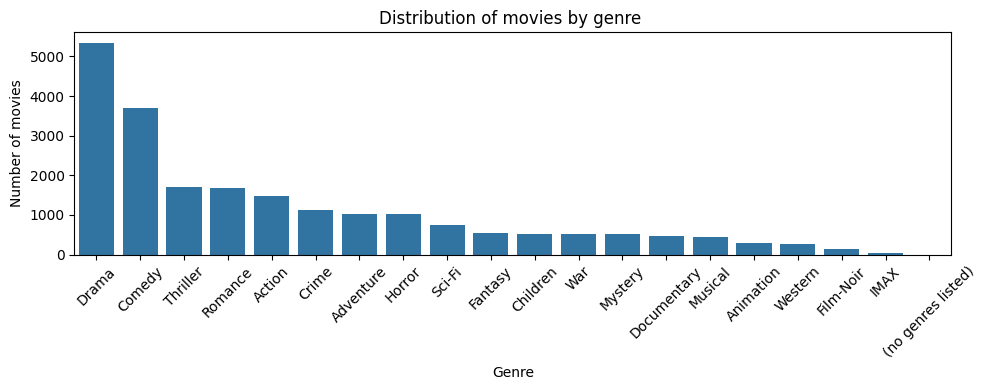

In [104]:
plt.figure(figsize=(10,4))
sns.countplot(data = exploded_movies , x='genres' , order=exploded_movies['genres'].value_counts().index)
plt.title('Distribution of movies by genre ')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [110]:
exploded_movies = exploded_movies.merge(ratings , on='movie_id' , how='inner' )
exploded_movies

,movie_id,title,genres,user_id,rating
0,1,Toy Story (1995),Adventure,5,1.0
1,1,Toy Story (1995),Adventure,14,3.0
2,1,Toy Story (1995),Adventure,18,3.0
3,1,Toy Story (1995),Adventure,23,5.0
4,1,Toy Story (1995),Adventure,24,5.0
...,...,...,...,...,...
25967189,65133,Blackadder Back & Forth (1999),Comedy,24495,4.0
25967190,65133,Blackadder Back & Forth (1999),Comedy,33384,3.0
25967191,65133,Blackadder Back & Forth (1999),Comedy,40570,2.0
25967192,65133,Blackadder Back & Forth (1999),Comedy,45430,2.5


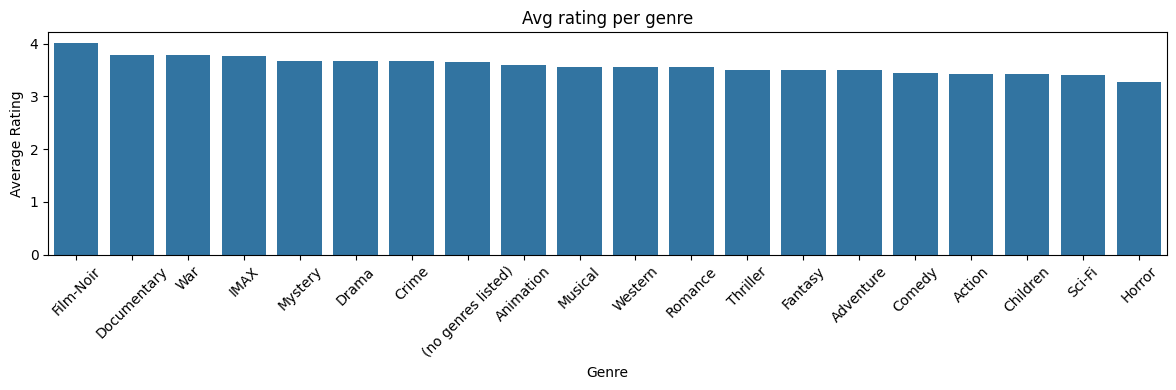

In [112]:
avg_rating_per_genre = exploded_movies.groupby('genres')['rating'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data = avg_rating_per_genre , x='genres' , y='rating' , order=avg_rating_per_genre.sort_values('rating' , ascending=False)['genres'])
plt.title('Avg rating per genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


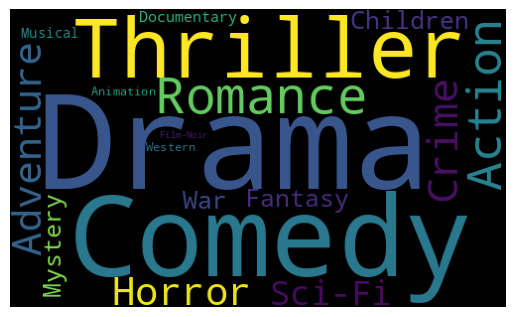

In [70]:
#prepare a wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=500 , height=300 , background_color='black' , min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [71]:
df_n_ratings = pd.DataFrame(df1.groupby('title')['rating'].mean())


In [72]:
df_n_ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.583333
'Round Midnight (1986),3.720000
'Til There Was You (1997),2.837748
"'burbs, The (1989)",2.969415
'night Mother (1986),3.450237


In [73]:
df_n_ratings['total ratings'] = df1.groupby('title')['rating'].count()

In [74]:
df_n_ratings.tail()

,rating,total ratings
title,,
eXistenZ (1999),3.316369,2908
ffolks (a.k.a. North Sea Hijack) (1980),3.051724,29
loudQUIETloud: A Film About the Pixies (2006),3.750000,8
xXx: State of the Union (2005),2.244582,323
"Âge d'or, L' (1930)",3.585106,47


In [75]:
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

In [76]:
df_n_ratings['mean ratings'] = df_n_ratings['mean ratings'].apply(lambda x : round(x , 2))

In [77]:
df_n_ratings

,mean ratings,total ratings
title,,
"""Great Performances"" Cats (1998)",3.58,6
'Round Midnight (1986),3.72,50
'Til There Was You (1997),2.84,302
"'burbs, The (1989)",2.97,1504
'night Mother (1986),3.45,211
...,...,...
eXistenZ (1999),3.32,2908
ffolks (a.k.a. North Sea Hijack) (1980),3.05,29
loudQUIETloud: A Film About the Pixies (2006),3.75,8


In [78]:
df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Pulp Fiction (1994),4.16,34864
Forrest Gump (1994),4.01,34457
"Silence of the Lambs, The (1991)",4.20,33668
Jurassic Park (1993),3.66,32631
"Shawshank Redemption, The (1994)",4.46,31126
Braveheart (1995),4.08,29154
"Fugitive, The (1993)",4.01,28951
Terminator 2: Judgment Day (1991),3.93,28948
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),4.22,28566


<Figure size 600x400 with 0 Axes>

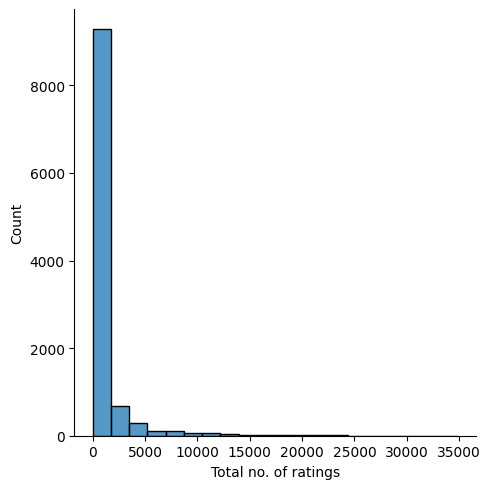

In [83]:
plt.figure(figsize=(6,4))
sns.displot(df_n_ratings['total ratings'] , bins=20) # bins = no. pf parts x axis is divided into
plt.xlabel('Total no. of ratings')
plt.ylabel('Count')
plt.show()

In [84]:
df_n_ratings.sort_values('mean ratings' , ascending=False).head(10)

,mean ratings,total ratings
title,,
"Blue Light, The (Das Blaue Licht) (1932)",5.00,1
Shadows of Forgotten Ancestors (1964),5.00,1
Satan's Tango (Sátántangó) (1994),5.00,2
Sun Alley (Sonnenallee) (1999),5.00,1
Fighting Elegy (Kenka erejii) (1966),5.00,1
Constantine's Sword (2007),4.75,2
"Human Condition III, The (Ningen no joken III) (1961)",4.75,4
"Human Condition II, The (Ningen no joken II) (1959)",4.75,4
More (1998),4.75,8


In [90]:
print("Total no. of movies with average rating of 5.0 :" , len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]))
print("Total no. of individual users that gave a rating of 5.0 :" , len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) &(df_n_ratings['total ratings'] == 1) ]))

Total no. of movies with average rating of 5.0 : 5
Total no. of individual users that gave a rating of 5.0 : 4


<Figure size 600x400 with 0 Axes>

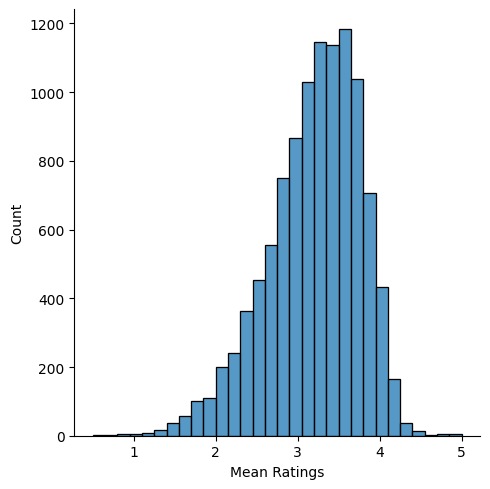

In [92]:
plt.figure(figsize=(6,4))
sns.displot(df_n_ratings['mean ratings'] , bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Count')
plt.show()


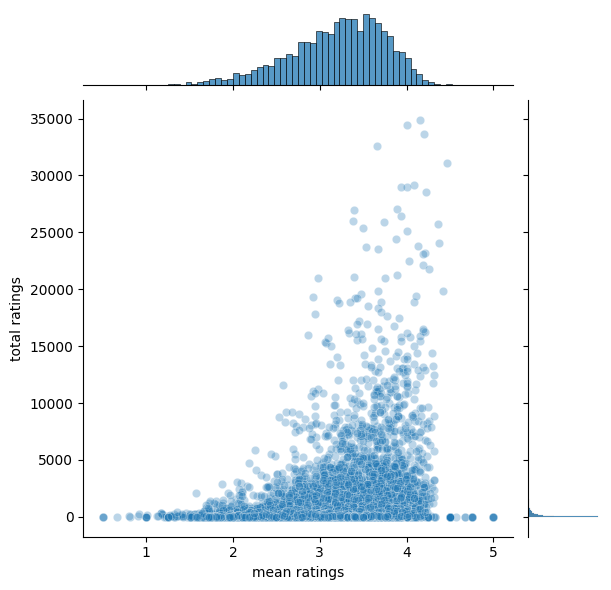

In [96]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings , alpha=0.3)

In [113]:
df1.head()


,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1.0,857911264
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3.0,1133572007
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1111545931
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,5.0,849543482
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,5.0,868254237


In [120]:
df_num_rating = df1.groupby('title').count()['rating'].reset_index()

In [121]:
df_num_rating.head()

,title,rating
0,"""Great Performances"" Cats (1998)",6
1,'Round Midnight (1986),50
2,'Til There Was You (1997),302
3,"'burbs, The (1989)",1504
4,'night Mother (1986),211


In [122]:
df_num_rating.rename(columns={'rating' : 'num_ratings'} , inplace=True)

In [123]:
df_num_rating.head()

,title,num_ratings
0,"""Great Performances"" Cats (1998)",6
1,'Round Midnight (1986),50
2,'Til There Was You (1997),302
3,"'burbs, The (1989)",1504
4,'night Mother (1986),211


In [152]:
df1.head()

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1.0,857911264
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3.0,1133572007
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1111545931
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,5.0,849543482
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,5.0,868254237


In [155]:
df_avg_rating = df1.groupby('title').mean(numeric_only=True)['rating'].reset_index()

In [156]:
df_avg_rating.rename(columns={'rating': 'avg_rating'},inplace=True)

In [158]:
df_avg_rating.head()

,title,avg_rating
0,"""Great Performances"" Cats (1998)",3.583333
1,'Round Midnight (1986),3.720000
2,'Til There Was You (1997),2.837748
3,"'burbs, The (1989)",2.969415
4,'night Mother (1986),3.450237


In [160]:
df1.head()

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1.0,857911264
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3.0,1133572007
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1111545931
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,5.0,849543482
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,5.0,868254237


In [163]:

sample_df = df1.groupby('user_id').count()['rating'].reset_index()
sample_df.head()


,user_id,rating
0,1,22
1,2,20
2,3,33
3,4,38
4,5,87


In [164]:
sample_df.describe()

,user_id,rating
count,69878.000000,69878.00000
mean,35782.217393,143.10733
std,20613.909098,216.71258
min,1.000000,20.00000
25%,17943.250000,35.00000
50%,35798.500000,69.00000
75%,53619.750000,156.00000
max,71567.000000,7359.00000


In [185]:
sample_df[sample_df['rating'] == 7359]

,user_id,rating
57959,59269,7359


In [222]:
#eliminate all users who have given less than 150 ratings
filter_criteria = df1.groupby('user_id').count()['rating'] > 150
filtered_users = filter_criteria[filter_criteria].index


In [223]:
filtered_users

Index([    8,    18,    19,    34,    36,    38,    51,    56,    58,    65,
       ...
       71537, 71538, 71543, 71546, 71550, 71553, 71555, 71557, 71558, 71562],
      dtype='int64', name='user_id', length=18149)

In [224]:
df1['user_id'].isin(filtered_users)

0           False
1           False
2            True
3           False
4           False
            ...  
10000049     True
10000050     True
10000051     True
10000052     True
10000053    False
Name: user_id, Length: 10000054, dtype: bool

In [225]:
filtered_rating = df1[df1['user_id'].isin(filtered_users)]

In [226]:
filtered_rating.head()

,movie_id,title,genres,user_id,rating,timestamp
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1111545931
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,3.0,981560889
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,36,4.0,1049770839
12,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,56,4.5,1162155272
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,4.0,951028439


In [227]:
sample_movie_df = filtered_rating.groupby('title').count()['rating'].reset_index()

In [228]:
sample_movie_df.head()

,title,rating
0,"""Great Performances"" Cats (1998)",5
1,'Round Midnight (1986),45
2,'Til There Was You (1997),212
3,"'burbs, The (1989)",1268
4,'night Mother (1986),171


In [229]:
sample_movie_df.describe()

,rating
count,10664.000000
mean,650.669542
std,1444.272382
min,1.000000
25%,30.000000
50%,118.500000
75%,523.000000
max,14078.000000


In [230]:
#eliminate all movies which have been given less than 150 ratings
movie_filter_criteria = filtered_rating.groupby('title').count()['rating'] >= 150

In [231]:
famous_movies = movie_filter_criteria[movie_filter_criteria].index

In [232]:
famous_movies

Index([''Til There Was You (1997)', ''burbs, The (1989)',
       ''night Mother (1986)', '*batteries not included (1987)',
       '...And Justice for All (1979)', '10 (1979)',
       '10 Things I Hate About You (1999)', '10,000 B.C. (2008)',
       '101 Dalmatians (1996)', '101 Reykjavik (101 Reykjavík) (2000)',
       ...
       'Zelig (1983)', 'Zentropa (Europa) (1991)', 'Zero Effect (1998)',
       'Zodiac (2007)', 'Zoolander (2001)',
       'Zorba the Greek (Alexis Zorbas) (1964)', 'Zorro, the Gay Blade (1981)',
       'Zulu (1964)', 'eXistenZ (1999)', 'xXx: State of the Union (2005)'],
      dtype='object', name='title', length=4867)

In [233]:
df_final = filtered_rating[filtered_rating['title'].isin(famous_movies)]

In [234]:
df_final.head()

,movie_id,title,genres,user_id,rating,timestamp
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1111545931
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,3.0,981560889
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,36,4.0,1049770839
12,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,56,4.5,1162155272
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,4.0,951028439


In [235]:
df_final.describe()

,movie_id,user_id,rating,timestamp
count,6.668160e+06,6.668160e+06,6.668160e+06,6.668160e+06
mean,4.399474e+03,3.588479e+04,3.466591e+00,1.054498e+09
std,8.995197e+03,2.059905e+04,1.050840e+00,1.017387e+08
min,1.000000e+00,8.000000e+00,5.000000e-01,8.248354e+08
25%,1.051000e+03,1.812700e+04,3.000000e+00,9.696815e+08
50%,2.115000e+03,3.563300e+04,3.500000e+00,1.061896e+09
75%,3.910000e+03,5.360200e+04,4.000000e+00,1.135099e+09
max,6.499700e+04,7.156200e+04,5.000000e+00,1.231130e+09


In [236]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6668160 entries, 2 to 10000015
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movie_id   int64  
 1   title      object 
 2   genres     object 
 3   user_id    int64  
 4   rating     float64
 5   timestamp  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 356.1+ MB


In [237]:
df_final['title'].unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Tropic Thunder (2008)', 'Burn After Reading (2008)',
       'Quantum of Solace (2008)'], dtype=object)

In [238]:
len(df_final['title'].unique())

4867

In [239]:
df_final.to_csv('/content/final_df.csv')